In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,roc_curve

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("iot23_final_preprocessed.csv")

In [3]:
df.head()

,Unnamed: 0,duration,orig_bytes,resp_bytes,orig_pkts,resp_pkts,label,proto_tcp,proto_udp,conn_state_REJ,...,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR,service_dhcp,service_dns,service_http,service_irc,service_ssh,service_ssl
0,20,0.000061,0.0,0.0,3.0,0.0,PartOfAHorizontalPortScan,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21,0.000000,0.0,0.0,1.0,0.0,PartOfAHorizontalPortScan,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23,0.000061,0.0,0.0,3.0,0.0,PartOfAHorizontalPortScan,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,24,0.000000,0.0,0.0,1.0,0.0,PartOfAHorizontalPortScan,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27,0.000000,0.0,0.0,1.0,0.0,Benign,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(df.columns)

Index(['Unnamed: 0', 'duration', 'orig_bytes', 'resp_bytes', 'orig_pkts',
       'resp_pkts', 'label', 'proto_tcp', 'proto_udp', 'conn_state_REJ',
       'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR',
       'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
       'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR',
       'service_dhcp', 'service_dns', 'service_http', 'service_irc',
       'service_ssh', 'service_ssl'],
      dtype='object')


In [5]:
df['label'].unique()

array(['PartOfAHorizontalPortScan', 'Benign', 'Okiru', 'DDoS',
       'C&C-HeartBeat', 'C&C', 'Attack'], dtype=object)

In [6]:
df['label'].value_counts()

label
PartOfAHorizontalPortScan    825417
Okiru                        262503
Benign                       197274
DDoS                         138718
C&C                           15003
Attack                         3914
C&C-HeartBeat                   308
Name: count, dtype: int64

In [7]:
df['label'] = df['label'].map(lambda x: 0 if x == 'Benign' else 1)
df['label'].value_counts()

label
1    1245863
0     197274
Name: count, dtype: int64

In [8]:
X = df.drop("label",axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69,stratify=y)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)


In [25]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    booster='gbtree',
    eval_metric="logloss"  
)

# Train the model
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

[0]	validation_0-logloss:0.30593
[1]	validation_0-logloss:0.27043
[2]	validation_0-logloss:0.24799
[3]	validation_0-logloss:0.23289
[4]	validation_0-logloss:0.22251
[5]	validation_0-logloss:0.21520
[6]	validation_0-logloss:0.20982
[7]	validation_0-logloss:0.20613
[8]	validation_0-logloss:0.20354
[9]	validation_0-logloss:0.20167
[10]	validation_0-logloss:0.20029
[11]	validation_0-logloss:0.19911
[12]	validation_0-logloss:0.19816
[13]	validation_0-logloss:0.19746
[14]	validation_0-logloss:0.19696
[15]	validation_0-logloss:0.19655
[16]	validation_0-logloss:0.19632
[17]	validation_0-logloss:0.19605
[18]	validation_0-logloss:0.19585
[19]	validation_0-logloss:0.19571
[20]	validation_0-logloss:0.19559
[21]	validation_0-logloss:0.19519
[22]	validation_0-logloss:0.19461
[23]	validation_0-logloss:0.19430
[24]	validation_0-logloss:0.19422
[25]	validation_0-logloss:0.19395
[26]	validation_0-logloss:0.19342
[27]	validation_0-logloss:0.19301
[28]	validation_0-logloss:0.19289
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

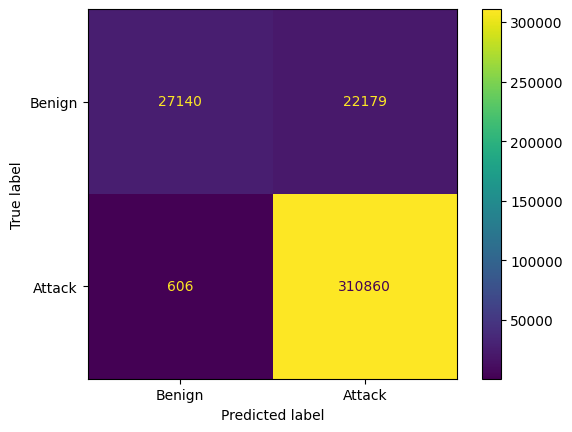

In [27]:
cm = confusion_matrix(y_true=y_test, y_pred=xgb_model.predict(X_test))

class_labels = ["Benign", "Attack"]  

ConfusionMatrixDisplay(cm, display_labels=class_labels).plot()

In [22]:
len(X_train)

1082352

In [11]:
import time

In [21]:

xgb_model_improved = xgb.XGBClassifier(
    objective='binary:logistic',  
    eval_metric='aucpr',  
    n_estimators=1,  
    gamma=0,
    learning_rate=0.1,
    max_depth=3,
    reg_lambda=1,
    scale_pos_weight=0.3,
    subsample=0.9,
    colsample_bytree=0.5
)

start_time = time.time()

xgb_model_improved.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],  
    verbose=True
)

end_time = time.time()
print(f"Training time: {end_time - start_time:.4f} seconds")


[0]	validation_0-aucpr:0.96249
Training time: 0.5145 seconds


In [18]:
xgb_model_improved = xgb.XGBClassifier(
    objective='binary:logistic',  
    eval_metric='aucpr'  
)

xgb_model_improved.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],  
    verbose=True
)


[0]	validation_0-aucpr:0.97644
[1]	validation_0-aucpr:0.97723
[2]	validation_0-aucpr:0.97737
[3]	validation_0-aucpr:0.97748
[4]	validation_0-aucpr:0.97749
[5]	validation_0-aucpr:0.97773
[6]	validation_0-aucpr:0.97776
[7]	validation_0-aucpr:0.97806
[8]	validation_0-aucpr:0.97819
[9]	validation_0-aucpr:0.97833
[10]	validation_0-aucpr:0.97837
[11]	validation_0-aucpr:0.97870
[12]	validation_0-aucpr:0.97870
[13]	validation_0-aucpr:0.97875
[14]	validation_0-aucpr:0.97876
[15]	validation_0-aucpr:0.97902
[16]	validation_0-aucpr:0.97900
[17]	validation_0-aucpr:0.97902
[18]	validation_0-aucpr:0.97902
[19]	validation_0-aucpr:0.97911
[20]	validation_0-aucpr:0.97911
[21]	validation_0-aucpr:0.97967
[22]	validation_0-aucpr:0.98065
[23]	validation_0-aucpr:0.98068
[24]	validation_0-aucpr:0.98070
[25]	validation_0-aucpr:0.98073
[26]	validation_0-aucpr:0.98141
[27]	validation_0-aucpr:0.98217
[28]	validation_0-aucpr:0.98218
[29]	validation_0-aucpr:0.98220
[30]	validation_0-aucpr:0.98222
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [12]:
print(classification_report(y_test,xgb_model_improved.predict(X_test)))
xgb_report = classification_report(y_test,xgb_model_improved.predict(X_test),output_dict=True)

              precision    recall  f1-score   support

           0       0.95      0.55      0.69     49319
           1       0.93      1.00      0.96    311466

    accuracy                           0.93    360785
   macro avg       0.94      0.77      0.83    360785
weighted avg       0.94      0.93      0.93    360785




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/rakesh018/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/rakesh018/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/rakesh018/.local/lib/python3.10

AttributeError: _ARRAY_API not found

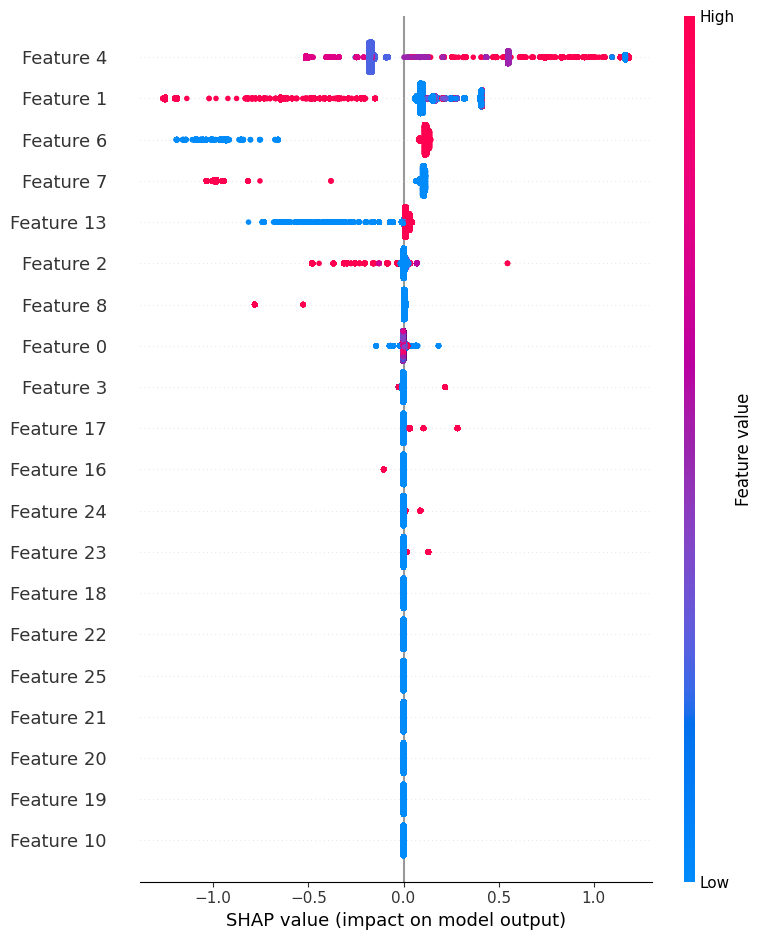

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [13]:
import shap

explainer = shap.Explainer(xgb_model_improved)

shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0])


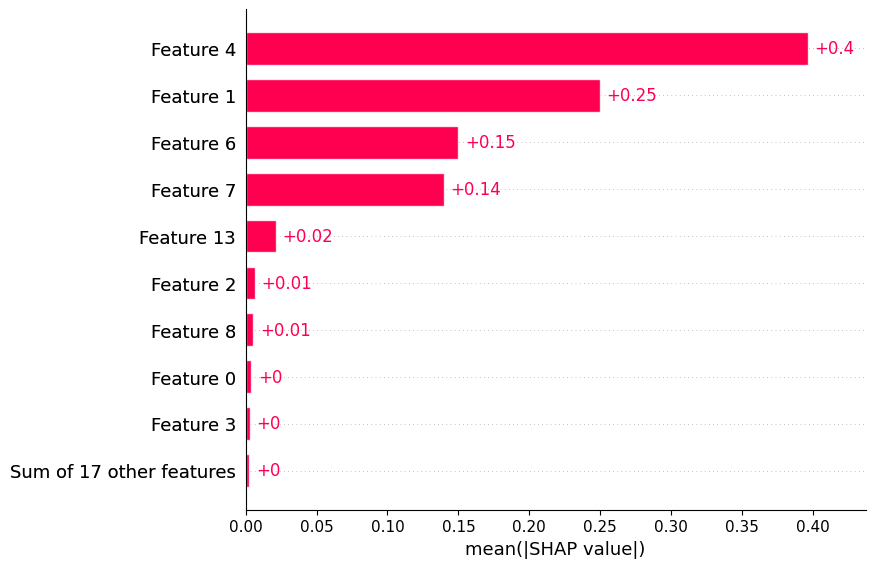

In [14]:
import shap

explainer = shap.Explainer(xgb_model_improved)
shap_values = explainer(X_test)

shap.plots.bar(shap_values)


In [47]:
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]

shap_importance = np.abs(shap_values.values).mean(axis=0)

feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "SHAP Importance": shap_importance
})

top_10_features = feature_importance.sort_values(by="SHAP Importance", ascending=False).head(10)

print(top_10_features)


       Feature  SHAP Importance
4    Feature 4         2.398126
1    Feature 1         1.129035
6    Feature 6         0.744853
0    Feature 0         0.406805
13  Feature 13         0.218738
5    Feature 5         0.046757
17  Feature 17         0.022892
2    Feature 2         0.020141
3    Feature 3         0.011032
23  Feature 23         0.009457
